In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
filePath = "arnetminer/AP_train.txt"
#filePath = "sample-data"
file = open(filePath,'r')

references={}        #{index, #references}
citations={}         #{index, #citations}
year_publications={} #{year, lis(publications index)}

for line in file:    
    
    # fetch publication id
    if line.startswith("#index"):
        index = line[6:].strip()       
    
    # create list of publications for each year in dataset
    if line.startswith("#t"):
        year = line[2:].strip()
        if year != "":            
            if year_publications.get(year) is None:
                year_publications[year] = [index]
            else:
                year_publications[year] = year_publications.get(year) + [index]
                    
    # compute the no. of references and citation for each publication                
    if line.startswith("#%"):
        reference = line[2:].strip()
        if reference != "":            
            if references.get(index) is None:
                references[index] = 1
            else:
                references[index] = references.get(index) + 1
            
            if citations.get(reference) is None:
                citations[reference] = 1
            else:
                citations[reference] = citations[reference] + 1
                        
file.close()

In [2]:
year_avgReferences = {} # average references per year
year_avgCitations = {}  # avergae citations per year

for year, pubs in year_publications.items(): 
    totalReferences = 0
    totalCitations = 0
    for p in pubs:
        totalReferences += 0 if references.get(p) is None else references.get(p)
        totalCitations += 0 if citations.get(p) is None else citations.get(p)
    year_avgReferences[int(year)] = float(totalReferences/len(pubs))
    year_avgCitations[int(year)] = float(totalCitations/len(pubs))

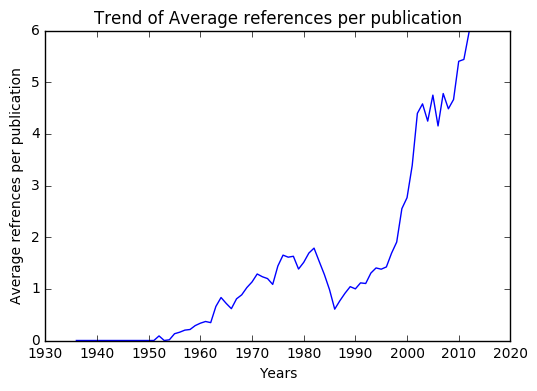

In [3]:
yvalues = np.array(list(year_avgReferences.values()))
xvalues = np.array(list(year_avgReferences.keys()))

plt.plot(xvalues, yvalues, '-', linewidth=1)
plt.ylabel('Average refrences per publication')
plt.xlabel('Years')
plt.title('Trend of Average references per publication') 
plt.show()
year_avgReferences.clear()

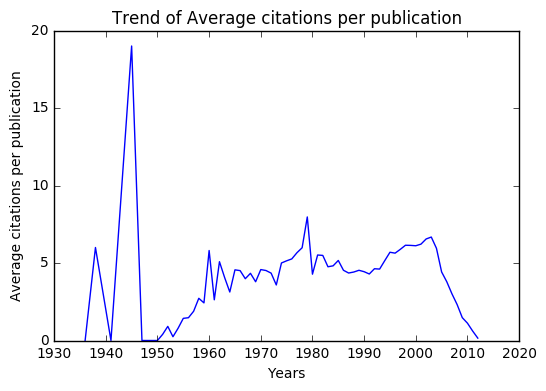

In [4]:
yvalues = np.array(list(year_avgCitations.values()))
xvalues = np.array(list(year_avgCitations.keys()))

plt.plot(xvalues, yvalues, '-', linewidth=1)
plt.ylabel('Average citations per publication')
plt.xlabel('Years')
plt.title('Trend of Average citations per publication') 
plt.show() 
year_avgCitations.clear()

Differences in Trends:

Average references per publication for 1st half of 20th century are low. However, it increase by a huge margin towards the end of 20th century and beginning of 21st century. This might be because, during the 1st half of 20th century, there were less number of relevant artiles/publications to refer. Where as, comparatively newer articles refered to older artiles. So, the new article have higher average references count. 
This can be proved by looking at the trends of average citations. The older article (before ~1947) have been cited more that the newer ones.